In [1]:
import urllib.request, zipfile, json
from pathlib import Path
import numpy as np, pandas as pd


In [2]:
koelink = "https://koe.io.ac.nz/user_data/history/jbraine-2024-10-21_04-15-09_UTC.zip"
audio_folder = Path("/home/julienb/Documents/Data/Hania/Bird 425/Audios/")
das_env = "das"
model_dir="das_models"
block_shoulder_duration = 0.1
nb_epoch=100

In [3]:
urllib.request.urlretrieve(koelink, "koetmp.zip")

('koetmp.zip', <http.client.HTTPMessage at 0x70ceec0e4550>)

In [4]:
zip = zipfile.Path("koetmp.zip")
list(zip.iterdir())

[Path('koetmp.zip', 'meta.json'),
 Path('koetmp.zip', 'root.extraattrvalue.json'),
 Path('koetmp.zip', 'songinfo.json'),
 Path('koetmp.zip', 'extraattr.json'),
 Path('koetmp.zip', 'segment.extraattrvalue.json'),
 Path('koetmp.zip', 'audiofile.extraattrvalue.json')]

In [5]:
labels = zip / "segment.extraattrvalue.json"
with labels.open("r") as f:
    labels = json.load(f)
labels = pd.DataFrame(labels, columns=["id", "?", "label"])[["id", "label"]]
labels

,id,label
0,3694568,a
1,3694570,c
2,3694571,a
3,3694572,b
4,3695216,b
5,3695217,a
6,3695218,c
7,3695219,a
8,3695220,b


In [6]:
timestamps = zip / "songinfo.json"
with timestamps.open("r") as f:
    timestamps = json.load(f)
# display(timestamps)file
# timestamps = pd.DataFrame(timestamps, columns=["id", "?", "label"])
all = []
for f, k in timestamps.items():
    all.append(pd.DataFrame(k[1], columns=["id", "start", "end", "?1", "?2", "?3", "?id2"]).assign(file=f)[["id", "file", "start", "end"]])
timestamps = pd.concat(all)
timestamps[["start", "end"]] = timestamps[["start", "end"]] /1000
timestamps

,id,file,start,end
0,3694568,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),3.30330,3.92448
1,3694570,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),4.02317,4.44697
2,3695216,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),5.13702,5.34520
3,3695217,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),5.51675,5.64590
4,3695218,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),6.22032,6.54030
5,3695219,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),49.68932,49.84739
6,3695220,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),49.90907,50.08833
0,3694571,gw243gw71_45160.22921978_8_22_6_22_1.wav (2),0.93126,1.11442
1,3694572,gw243gw71_45160.22921978_8_22_6_22_1.wav (2),1.34772,1.58680


In [7]:
annotations = pd.merge(timestamps, labels, on="id", how="outer").drop(columns="id")
annotations

,file,start,end,label
0,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),3.30330,3.92448,a
1,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),4.02317,4.44697,c
2,gw243gw71_45160.22921978_8_22_6_22_1.wav (2),0.93126,1.11442,a
3,gw243gw71_45160.22921978_8_22_6_22_1.wav (2),1.34772,1.58680,b
4,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),5.13702,5.34520,b
5,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),5.51675,5.64590,a
6,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),6.22032,6.54030,c
7,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),49.68932,49.84739,a
8,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),49.90907,50.08833,b


In [8]:
def find_audio(file):
    r = list(audio_folder.glob(f"**/{file}.*"))
    if len(r) == 0:
        return None
    if len(r) > 1:
        raise Exception("Multiple matching files")
    return r[0]
annotations["audio_path"] = annotations["file"].apply(find_audio)
annotations

,file,start,end,label,audio_path
0,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),3.30330,3.92448,a,/home/julienb/Documents/Data/Hania/Bird 425/Au...
1,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),4.02317,4.44697,c,/home/julienb/Documents/Data/Hania/Bird 425/Au...
2,gw243gw71_45160.22921978_8_22_6_22_1.wav (2),0.93126,1.11442,a,/home/julienb/Documents/Data/Hania/Bird 425/Au...
3,gw243gw71_45160.22921978_8_22_6_22_1.wav (2),1.34772,1.58680,b,/home/julienb/Documents/Data/Hania/Bird 425/Au...
4,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),5.13702,5.34520,b,/home/julienb/Documents/Data/Hania/Bird 425/Au...
5,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),5.51675,5.64590,a,/home/julienb/Documents/Data/Hania/Bird 425/Au...
6,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),6.22032,6.54030,c,/home/julienb/Documents/Data/Hania/Bird 425/Au...
7,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),49.68932,49.84739,a,/home/julienb/Documents/Data/Hania/Bird 425/Au...
8,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),49.90907,50.08833,b,/home/julienb/Documents/Data/Hania/Bird 425/Au...


In [9]:
annotations = annotations.sort_values(["file", "start"])
annotations["block_change"] = (annotations["file"] != annotations["file"].shift(1)) | ((annotations["start"] - 2*block_shoulder_duration) > annotations["end"].shift(1))
annotations["block"] = annotations["block_change"].cumsum()
annotations

,file,start,end,label,audio_path,block_change,block
0,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),3.30330,3.92448,a,/home/julienb/Documents/Data/Hania/Bird 425/Au...,True,1
1,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),4.02317,4.44697,c,/home/julienb/Documents/Data/Hania/Bird 425/Au...,False,1
4,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),5.13702,5.34520,b,/home/julienb/Documents/Data/Hania/Bird 425/Au...,True,2
5,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),5.51675,5.64590,a,/home/julienb/Documents/Data/Hania/Bird 425/Au...,False,2
6,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),6.22032,6.54030,c,/home/julienb/Documents/Data/Hania/Bird 425/Au...,True,3
7,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),49.68932,49.84739,a,/home/julienb/Documents/Data/Hania/Bird 425/Au...,True,4
8,gw243gw71_45160.22842992_8_22_6_20_42.wav (1),49.90907,50.08833,b,/home/julienb/Documents/Data/Hania/Bird 425/Au...,False,4
2,gw243gw71_45160.22921978_8_22_6_22_1.wav (2),0.93126,1.11442,a,/home/julienb/Documents/Data/Hania/Bird 425/Au...,True,5
3,gw243gw71_45160.22921978_8_22_6_22_1.wav (2),1.34772,1.58680,b,/home/julienb/Documents/Data/Hania/Bird 425/Au...,True,6


In [10]:
classes = {"noise": 0}
curr_class_count=1

block = pd.DataFrame()
block["start"] = annotations.groupby("block")["start"].min() - block_shoulder_duration
block["stop"] = annotations.groupby("block")["end"].max() + block_shoulder_duration
block["file"] = annotations.groupby("block")["audio_path"].head()
block["n_syb"] = annotations.groupby("block")["label"].count()

def get_data(file, start, end):
    import scipy.io
    fs, data = scipy.io.wavfile.read(file)
    return fs, data[int(start*fs):int(end*fs)]
# display(block.apply(lambda row: get_data(row["file"], row["start"], row["stop"]), axis=1, result_type="expand"))
block[["fs", "data"]] = block.apply(lambda row: get_data(row["file"], row["start"], row["stop"]), axis=1, result_type="expand")
block = block.reset_index()
def get_syb_data(row):
    global curr_class_count
    fs=row["fs"]
    sybs = annotations.loc[annotations["block"] == row["block"]]
    result = np.full(row["data"].shape, fill_value=classes["noise"], dtype=int)
    for _, syb in sybs.iterrows():
        if not syb["label"] in classes:
            classes[syb["label"]] = curr_class_count
            curr_class_count+=1
        result[int(fs*(syb["start"]-row["start"])): int(fs*(syb["end"]-row["start"]))] = classes[syb["label"]]
    return result
block["syb_data"] = block.apply(get_syb_data, axis=1)
block


,block,start,stop,file,n_syb,fs,data,syb_data
0,1,3.20330,4.54697,/home/julienb/Documents/Data/Hania/Bird 425/Au...,2,44100,"[336, 301, 334, 386, 323, 329, 379, 343, 348, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,5.03702,5.74590,/home/julienb/Documents/Data/Hania/Bird 425/Au...,2,44100,"[623, 292, -145, -504, -506, -429, -202, 70, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,3,6.12032,6.64030,/home/julienb/Documents/Data/Hania/Bird 425/Au...,1,44100,"[-280, -272, -273, -276, -260, -258, -267, -24...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,49.58932,50.18833,/home/julienb/Documents/Data/Hania/Bird 425/Au...,2,44100,"[-74, -79, -66, -82, -70, -44, -52, -85, -57, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,0.83126,1.21442,/home/julienb/Documents/Data/Hania/Bird 425/Au...,1,44100,"[287, 266, 263, 251, 255, 236, 235, 262, 270, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,6,1.24772,1.68680,/home/julienb/Documents/Data/Hania/Bird 425/Au...,1,44100,"[647, 668, 692, 681, 726, 708, 628, 705, 742, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [11]:
rng_data = np.random.randint(0, 100, size = len(block.index))
block["data_usage"] = np.where(rng_data < 70, "train", 
                           np.where(rng_data < 90, "val", 
                            "test"))
block

,block,start,stop,file,n_syb,fs,data,syb_data,data_usage
0,1,3.20330,4.54697,/home/julienb/Documents/Data/Hania/Bird 425/Au...,2,44100,"[336, 301, 334, 386, 323, 329, 379, 343, 348, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",val
1,2,5.03702,5.74590,/home/julienb/Documents/Data/Hania/Bird 425/Au...,2,44100,"[623, 292, -145, -504, -506, -429, -202, 70, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",train
2,3,6.12032,6.64030,/home/julienb/Documents/Data/Hania/Bird 425/Au...,1,44100,"[-280, -272, -273, -276, -260, -258, -267, -24...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",train
3,4,49.58932,50.18833,/home/julienb/Documents/Data/Hania/Bird 425/Au...,2,44100,"[-74, -79, -66, -82, -70, -44, -52, -85, -57, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",train
4,5,0.83126,1.21442,/home/julienb/Documents/Data/Hania/Bird 425/Au...,1,44100,"[287, 266, 263, 251, 255, 236, 235, 262, 270, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",train
5,6,1.24772,1.68680,/home/julienb/Documents/Data/Hania/Bird 425/Au...,1,44100,"[647, 668, 692, 681, 726, 708, 628, 705, 742, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",train


In [12]:
invert_classes = {v: k for k, v in classes.items()}
ordered_classes = [invert_classes[i] for i in range(len(classes))]

x_train = np.concatenate(block.loc[block["data_usage"] == "train", "data"].to_list())
y_train = np.concatenate(block.loc[block["data_usage"] == "train", "syb_data"].to_list())
x_val = np.concatenate(block.loc[block["data_usage"] == "val", "data"].to_list())
y_val = np.concatenate(block.loc[block["data_usage"] == "val", "syb_data"].to_list())
has_test = len(block.loc[block["data_usage"] == "test", "data"].index) > 0
if has_test:
    x_test = np.concatenate(block.loc[block["data_usage"] == "test", "data"].to_list())
    y_test = np.concatenate(block.loc[block["data_usage"] == "test", "syb_data"].to_list())

def convert_to_probabilities(a):
    res = np.zeros((a.size, len(classes)))
    res[np.arange(a.size), a] = 1
    return res

if not (block["fs"] == block["fs"].iat[0]).all():
    raise Exception("Problem, no common fs")
else:
    common_fs = block["fs"].iat[0]

all = dict(train= dict(x= x_train.reshape(-1, 1),y=convert_to_probabilities(y_train)),
           val=dict(x=x_val.reshape(-1, 1), y=convert_to_probabilities(y_val)),
           **dict(test=dict(x=x_test.reshape(-1, 1), y=convert_to_probabilities(y_test))) if has_test else {},
           attrs = dict(samplerate_x_Hz=common_fs, samplerate_y_Hz=common_fs, class_names=ordered_classes, class_types=["segment"]*len(classes))
)

dir = Path("das_train_dataset.npy")

for folder in all:
    if folder != "attrs":
        (dir/folder).mkdir(exist_ok=True, parents=True)
        for arr in all[folder]:
            np.save(dir/folder/(arr + ".npy"),  all[folder][arr])
    else:
        np.save(dir/"attrs.npy", all["attrs"], allow_pickle=True)

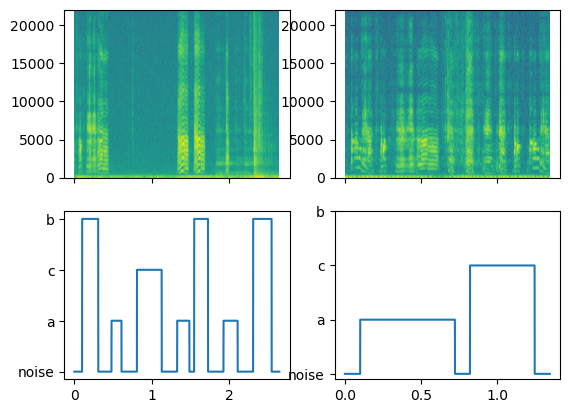

In [13]:
import matplotlib.pyplot as plt

f, axs= plt.subplots(2, 3 if has_test else 2, sharex="col")
axs[0, 0].specgram(x_train.reshape(-1), Fs= common_fs)
axs[1, 0].plot(np.arange(y_train.size)/common_fs, y_train.reshape(-1))
axs[1, 0].set_yticks(np.arange(len(classes)), ordered_classes)
axs[0, 1].specgram(x_val.reshape(-1), Fs= common_fs)
axs[1, 1].plot(np.arange(y_val.size)/common_fs, y_val.reshape(-1))
axs[1, 1].set_yticks(np.arange(len(classes)), ordered_classes)
if has_test:
    axs[0, 2].specgram(x_test.reshape(-1), Fs= common_fs)
    axs[1, 2].plot(np.arange(y_test.size)/common_fs, y_test.reshape(-1))
    axs[1, 2].set_yticks(np.arange(len(classes)), ordered_classes)
plt.show()

In [14]:

import subprocess

# conda_env = subprocess.run(f"conda info --envs | grep -Po '{das_env}\K.*' | sed 's: ::g'", shell=True, stdout=subprocess.PIPE).stdout
Path(model_dir).mkdir(exist_ok=True, parents=True)
command = f"conda run -n das das train --data-dir {dir} --nb-epoch {nb_epoch} --save-dir {model_dir}"



In [15]:
subprocess.run(command.split())

Model: "TCN"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1024, 1)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 1024, 16)     32          ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 1024, 16)     4112        ['conv1d[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 1024, 16)     0           ['conv1d_1[0][0]']               
                                                                                                

2024-10-21 06:39:04.199806: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-21 06:39:06.782752: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-21 06:39:06.799606: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-21 06:39:06.799780: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
INFO:das.train:Loading data from das_train_dat

CompletedProcess(args=['conda', 'run', '-n', 'das', 'das', 'train', '--data-dir', 'das_train_dataset.npy', '--save-name', 'das_model.h5', '--nb-epoch', '100', '--save-dir', 'das_models'], returncode=0)

In [16]:
# from IPython.core.magic import register_line_magic


# @register_line_magic
# def runrealcmd(command):
#     process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True, stderr=subprocess.STDOUT, bufsize=1, close_fds=True, text=True)
#     for line in iter(process.stdout.readline, b''):
#         print(line.rstrip().decode('utf-8'))
#     process.stdout.close()
#     process.wait()
# runrealcmd(command)

In [17]:
# def run_cmd(cmd: str, stderr=subprocess.STDOUT) -> None:
#     import sys
#     """Run a command in terminal

#     Args:
#         cmd (str): command to run in terminal
#         stderr (subprocess, optional): Where the error has to go. Defaults to subprocess.STDOUT.

#     Raises:
#         e: Excetion of the CalledProcessError
#     """
#     out = None
#     try:
#         out = subprocess.check_output(
#             [cmd],
#             shell=True,
#             stderr=stderr,
#             universal_newlines=True,
#         )
#     except subprocess.CalledProcessError as e:
#         print(f'ERROR {e.returncode}: {cmd}\n\t{e.output}',
#               flush=True, file=sys.stderr)
#         raise e
#     print(out)
# run_cmd(command)

In [18]:
# !{command}

In [19]:

# subprocess.run(command.split())
